In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from scipy.stats import sem
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import classification_report, recall_score, precision_score, make_scorer

%matplotlib inline

url_df = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/df_procesado_genderandage.csv'
url_df45_sinoutliers = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/Sin_outliers/df_v45sinoutliers.csv'
df = pd.read_csv(url_df45_sinoutliers)
df = df.drop(['Unnamed: 0'], axis = 1)


In [ ]:
y = df['MET_SYM']
vars_descarte = ['REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'REQ_SUM', 'MET_SYM', 'BPXSY1', 'BPXDI1', 'BMXWAIST', 'LBXTR', 'BPQ090D', 'LBDHDD', 'BPQ040A', 'LBXGLU', 'DIQ070', 'BMXHT', 'BMXWT', 'SEQN', 'DPQ050', 'MCQ010', 'DBQ700', 'ALQ130', 'ALQ130_Tramos', 'PAQ665', 'PAQ620', 'PAQ605', 'BPQ050A']
X = df.drop(vars_descarte, axis = 1)


In [ ]:
vars_descarte_ms = ['REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'REQ_SUM', 'BPXSY1', 'BPXDI1', 'BMXWAIST', 'LBXTR', 'BPQ090D', 'LBDHDD', 'BPQ040A', 'LBXGLU', 'DIQ070', 'BMXHT', 'BMXWT', 'SEQN', 'DPQ050', 'MCQ010', 'DBQ700', 'ALQ130', 'ALQ130_Tramos', 'PAQ665', 'PAQ620', 'PAQ605', 'BPQ050A']
df_ms = df.drop(vars_descarte_ms, axis = 1)

In [ ]:
#CON PCA
#Normalización
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
#Aplicar PCA 
#fijamos componentes
pca = PCA(n_components=26)
X_pca = pca.fit_transform(X)
X_pca.shape
#Separar datos en train, test, entrada y salida despues del PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
cols = X_train.columns

In [ ]:
#SIN PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
cols = X_train.columns
#SCALER

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

X_train.describe()

,DIQ010,INQ020,INDFMMPI,INDFMMPC,BMXBMI,BPQ030,LBXIN,MCQ080,MCQ220,MCQ300C,...,DPQ030,DPQ040,RIDAGEYR_Tramos,Etnia_1.0,Etnia_2.0,Etnia_3.0,Etnia_4.0,Etnia_6.0,Etnia_7.0,WHI
count,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,...,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04
mean,4.904880e-17,1.667349e-16,7.758957e-17,-9.147510e-16,6.311514e-17,-1.150976e-15,2.837288e-16,6.109843e-16,-9.760117e-16,-3.157823e-17,...,3.087776e-16,1.264488e-15,5.011088e-16,3.186286e-16,-6.410696e-18,3.021241e-16,7.362434e-16,-5.097924e-16,3.867520e-16,-3.787528e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,...,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-3.958616e-01,-1.850909e+00,-1.530960e+00,-1.276009e+00,-2.129124e+00,-5.762041e-01,-9.753382e-01,-6.852288e-01,-2.951299e-01,-7.409271e-01,...,-5.418423e-01,-6.570211e-01,-1.468636e+00,-4.153361e-01,-3.414433e-01,-7.321343e-01,-5.460217e-01,-3.867179e-01,-2.034207e-01,-2.244894e+00
25%,-3.958616e-01,5.402750e-01,-7.843110e-01,-1.276009e+00,-6.933691e-01,-5.762041e-01,-2.149142e-01,-6.852288e-01,-2.951299e-01,-7.409271e-01,...,-5.418423e-01,-6.570211e-01,-7.418592e-01,-4.153361e-01,-3.414433e-01,-7.321343e-01,-5.460217e-01,-3.867179e-01,-2.034207e-01,-7.136816e-01
50%,-3.958616e-01,5.402750e-01,-6.557375e-02,9.127443e-01,-1.303280e-01,-5.762041e-01,-1.497109e-01,-6.852288e-01,-2.951299e-01,-7.409271e-01,...,-5.418423e-01,-6.570211e-01,-1.508201e-02,-4.153361e-01,-3.414433e-01,-7.321343e-01,-5.460217e-01,-3.867179e-01,-2.034207e-01,-4.410566e-02
75%,-3.958616e-01,5.402750e-01,5.362815e-01,9.127443e-01,4.749411e-01,-5.762041e-01,-9.212864e-02,1.459367e+00,-2.951299e-01,1.349660e+00,...,6.128701e-01,4.830320e-01,7.116951e-01,-4.153361e-01,-3.414433e-01,1.365870e+00,-5.460217e-01,-3.867179e-01,-2.034207e-01,5.695696e-01
max,2.663968e+00,5.402750e-01,1.958055e+00,9.127443e-01,8.118224e+00,1.735496e+00,5.680503e+01,1.459367e+00,3.388338e+00,1.349660e+00,...,2.922295e+00,2.763138e+00,1.438472e+00,2.407689e+00,2.928744e+00,1.365870e+00,1.831429e+00,2.585865e+00,4.915921e+00,5.447689e+00


In [ ]:
X_train.shape

(21492, 31)

In [ ]:
#CON PCA
#Normalización
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
#Aplicar PCA 
#fijamos componentes
pca = PCA(n_components=26)
X_pca = pca.fit_transform(X)
X_pca.shape
#Separar datos en train, test, entrada y salida despues del PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

#Random forest default sin PCA

https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance/notebook

In [ ]:
#10 arboles de decision
# import Random Forest classifier




# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8762


In [ ]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train_pca, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test_pca)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8653


In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

NameError: ignored

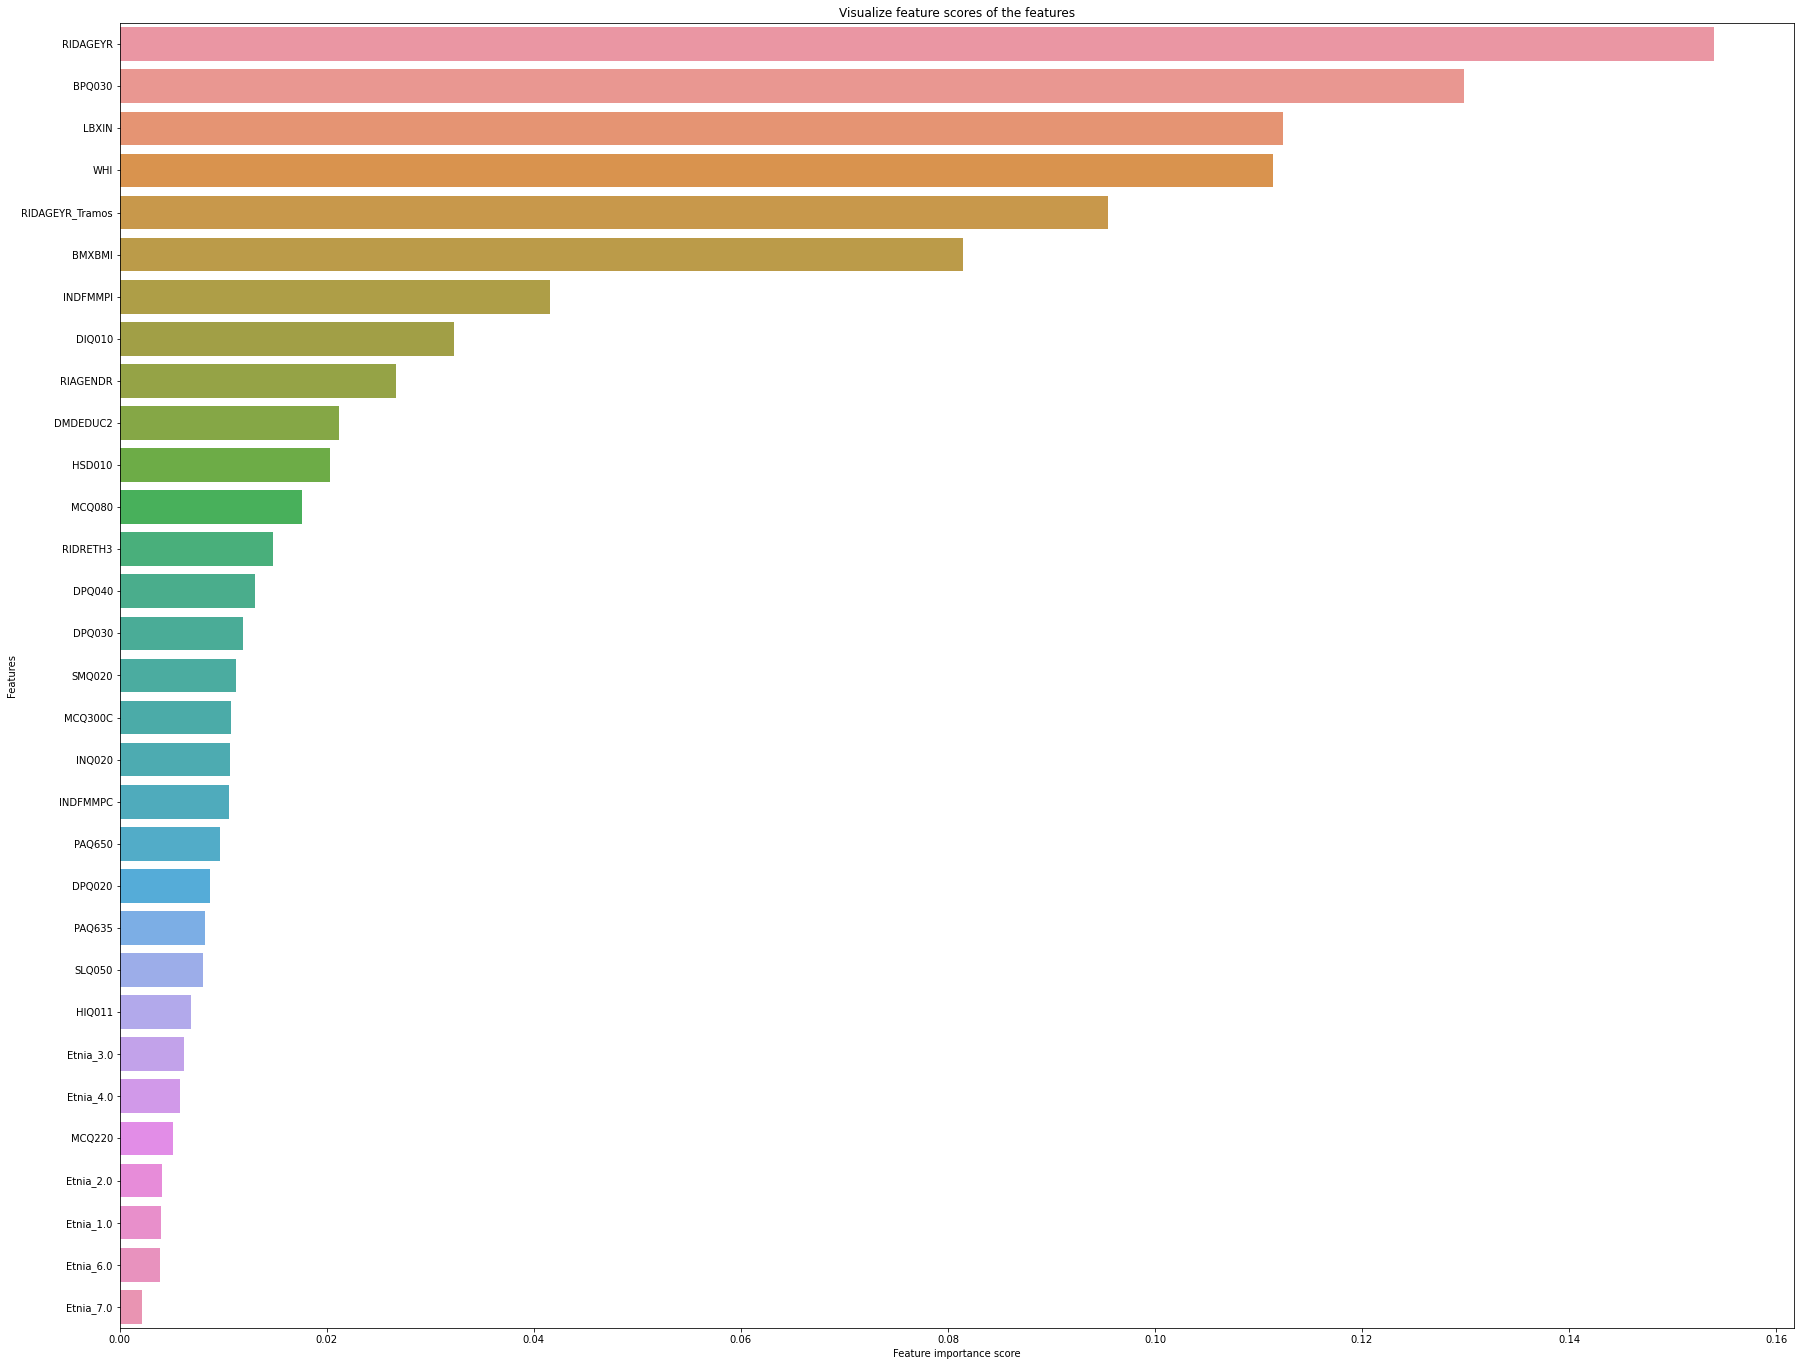

In [ ]:
# Creating a seaborn bar plot
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

##Grid Search

In [ ]:
param_grid = {'max_depth': np.arange(3, 10)} 

gs = GridSearchCV(RandomForestClassifier(), param_grid)

gs.fit(X_train_pca, y_train)

# summarize the results of the grid search
print("Best score: ", gs.best_score_)
print("Best params: ", gs.best_params_)

In [ ]:
# We print the score for each value of max_depth
for i, max_depth in enumerate(gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (gs.cv_results_['mean_test_score'][i],
                                        gs.cv_results_['std_test_score'][i] * 2,
                                        max_depth))

0.836 (+/-0.009) for {'max_depth': 3}
0.844 (+/-0.006) for {'max_depth': 4}
0.846 (+/-0.007) for {'max_depth': 5}
0.853 (+/-0.011) for {'max_depth': 6}
0.857 (+/-0.005) for {'max_depth': 7}
0.860 (+/-0.006) for {'max_depth': 8}
0.863 (+/-0.005) for {'max_depth': 9}


In [ ]:
# create a composite estimator made by a pipeline of preprocessing and the RandomForest
model = Pipeline([
        ('scaler', StandardScaler()),
        ('DecisionTree', RandomForestClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, X, y, cv=cv)
print(scores)

[0.86453294 0.87755862 0.86751023 0.86899888 0.85671753 0.85815339
 0.8641102  0.87453462 0.86783321 0.85889799]


In [ ]:
model.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'scaler', 'DecisionTree', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'DecisionTree__bootstrap', 'DecisionTree__ccp_alpha', 'DecisionTree__class_weight', 'DecisionTree__criterion', 'DecisionTree__max_depth', 'DecisionTree__max_features', 'DecisionTree__max_leaf_nodes', 'DecisionTree__max_samples', 'DecisionTree__min_impurity_decrease', 'DecisionTree__min_samples_leaf', 'DecisionTree__min_samples_split', 'DecisionTree__min_weight_fraction_leaf', 'DecisionTree__n_estimators', 'DecisionTree__n_jobs', 'DecisionTree__oob_score', 'DecisionTree__random_state', 'DecisionTree__verbose', 'DecisionTree__warm_start'])

In [ ]:
# Set the parameters by cross-validation
#LLEVA TIEMPO

from sklearn.metrics import classification_report, recall_score, precision_score, make_scorer

# set of parameters to test
tuned_parameters = [{'max_depth': np.arange(8, 10),
   #                  'max_weights': [1, 10, 100, 1000]},
                     'criterion':['gini', 'entropy'], 
                     'min_samples_split': range(2, 18, 2),
                     'min_samples_leaf': [2, 5, 10],
                
                    }]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    if score == 'precision':
        scorer = make_scorer(precision_score, average='weighted', zero_division=0)
    elif score == 'recall':
        scorer = make_scorer(recall_score, average='weighted', zero_division=0)
    
    # cv = the fold of the cross-validation cv, defaulted to 5
    gs = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10, scoring=scorer)
    gs.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']

    for mean_score, std_score, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, std_score * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 14}

Grid scores on development set:

0.862 (+/-0.011) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.861 (+/-0.012) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.860 (+/-0.009) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.861 (+/-0.011) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.861 (+/-0.011) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.861 (+/-0.011) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 12}
0.860 (+/-0.010) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 14}
0.860 (+/-0.011) for {'criterion': 'gini', 

In [ ]:
'''
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6}

Grid scores on development set:

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3215
           1       0.82      0.84      0.83      2158

    accuracy                           0.86      5373
   macro avg       0.85      0.86      0.86      5373
weighted avg       0.86      0.86      0.86      5373


'''

##Random Forest con parametros ajustados sin PCA

In [ ]:
#Modelo tras ajuste de parámetros
max_depth = 9
min_samples_split = 6
min_samples_leaf = 2
criterion = 'gini'
random_state = 1
n_estimators=100

# Create random forest
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state, min_samples_split = min_samples_split, criterion = criterion, min_samples_leaf = min_samples_leaf)

# Train the model using the training sets
model.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=6,
                       random_state=1)

In [ ]:
# Evaluate Accuracy in training

from sklearn import metrics
y_train_pred = model.predict(X_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))
y_test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))
print('Confusion matrix', metrics.confusion_matrix(y_test, y_test_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Accuracy in training 0.885678391959799


In [ ]:
y_test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))
print('Confusion matrix', metrics.confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3215
           1       0.82      0.84      0.83      2158

    accuracy                           0.86      5373
   macro avg       0.86      0.86      0.86      5373
weighted avg       0.86      0.86      0.86      5373

Confusion matrix [[2829  386]
 [ 347 1811]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


##roc curve de random forest sin PCA con parámetros ajustados

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


roc_auc_score for DecisionTree:  0.9428476917599816


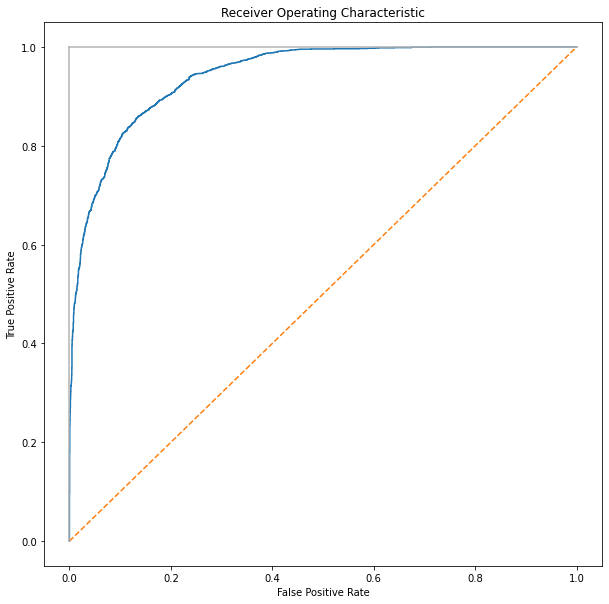

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
clf_tree = model

y_score1 = clf_tree.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
#overfitting

#tree train 7 test accuracy against max depth

import numpy as np
import matplotlib.pyplot as plt

max_depth_list = [1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in max_depth_list:
    model = RandomForestClassifier(max_depth=x) 
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_errors.append(metrics.accuracy_score(y_train, y_train_pred))
    test_errors.append(metrics.accuracy_score(y_test, y_test_pred))

plt.subplots(1, figsize=(10,10))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Error') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph


'''
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))
y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train_pca)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))


As observed from the above plot, with an increase in max_depth training AUC-ROC score continuously increases, but the test AUC score remains constants after a value of max depth. 
The best-fit decision tree is at a max depth value of 5. Increase the max depth value further can cause an overfitting problem.
'''

In [ ]:
#postpruning
# Allow a decision tree to grow to its full depth
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = RandomForestClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [roc_auc_score(y_train, clf.predict(X_train_pca)) for clf in clfs]
test_scores = [roc_auc_score(y_test, clf.predict(X_test_pca)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


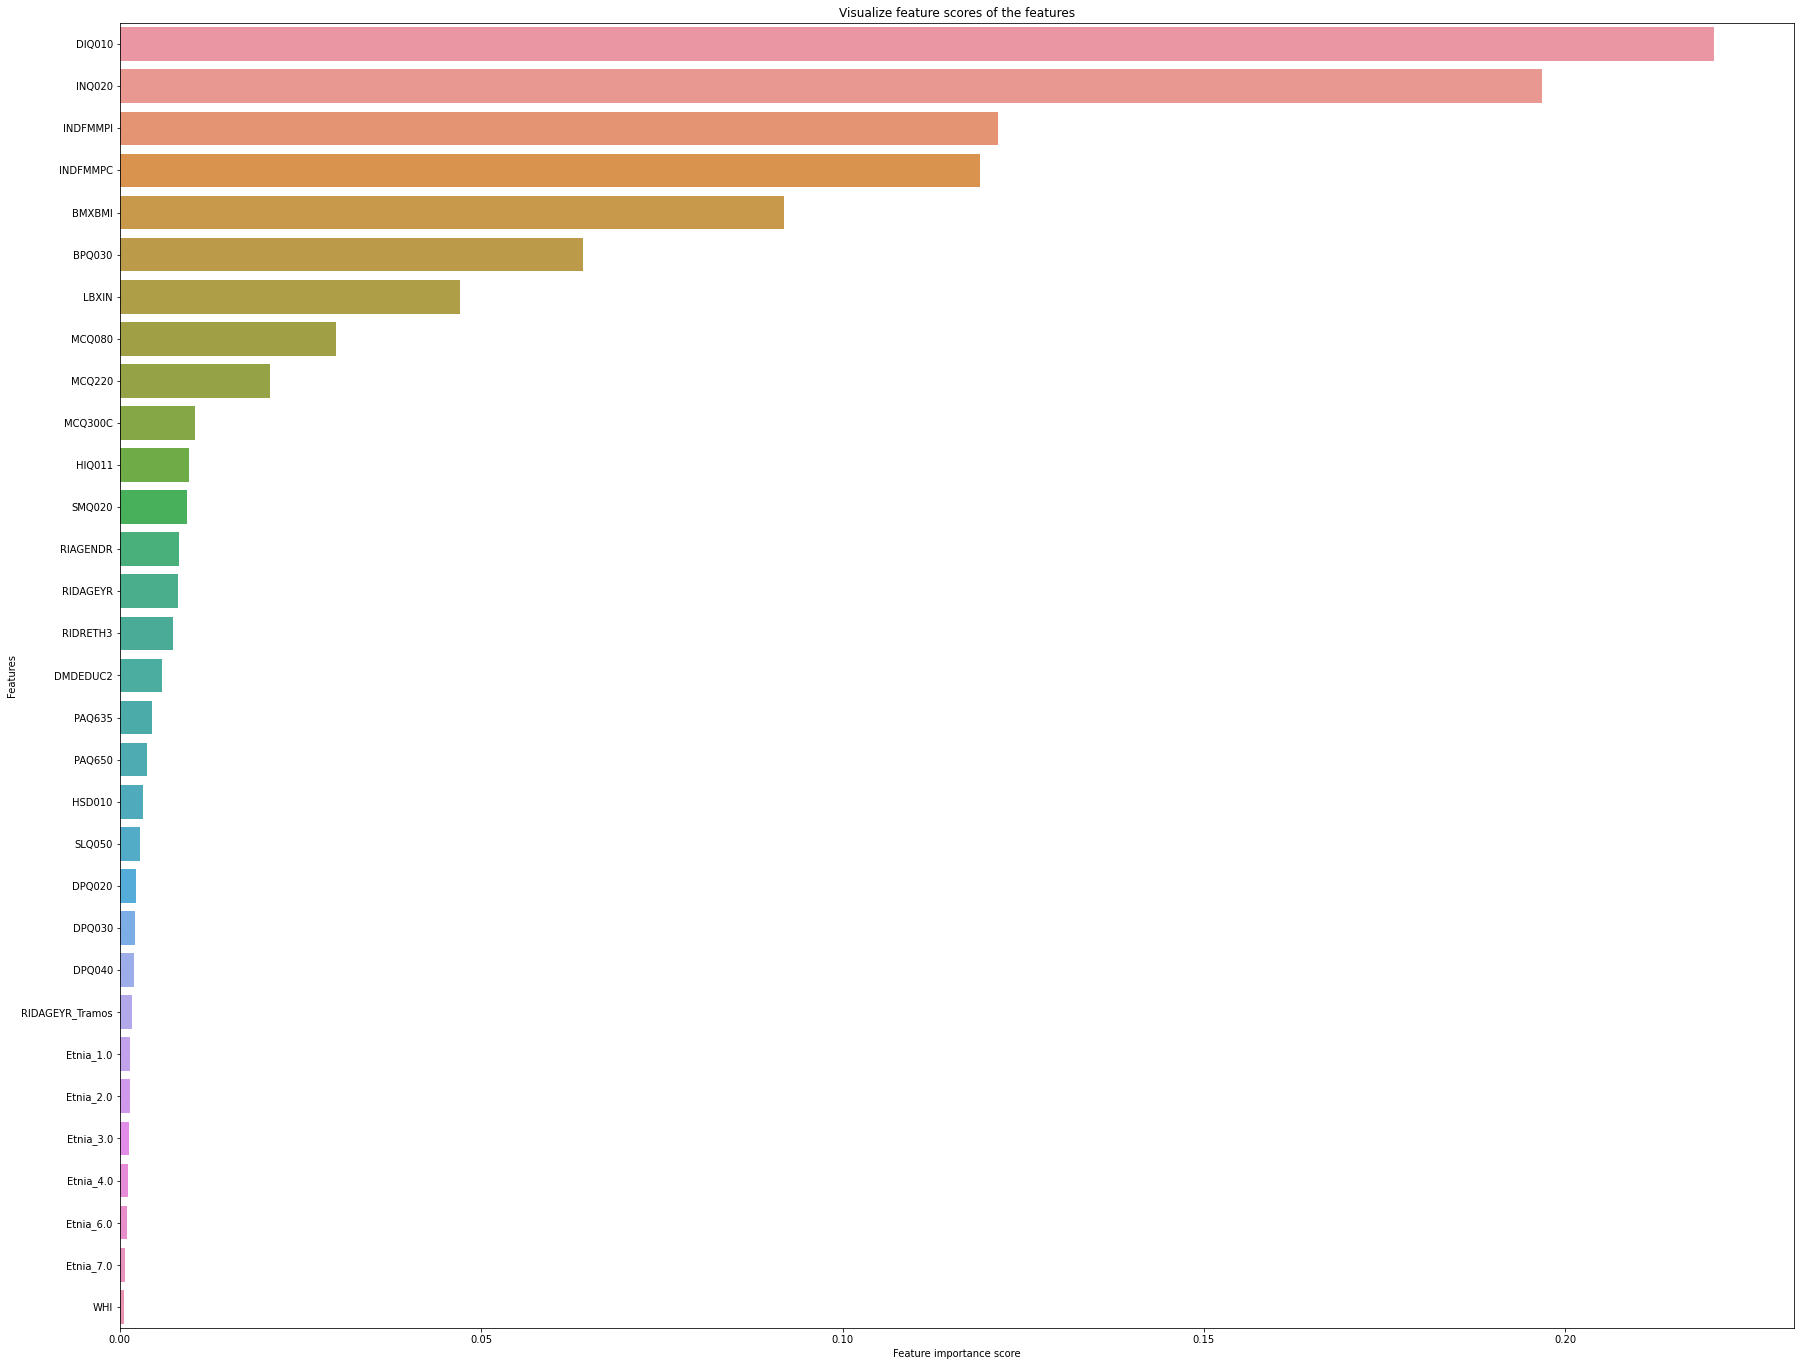

In [ ]:
# Creating a seaborn bar plot
# create the classifier with n_estimators = 100

clf = model
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

#feature_scores


# fit the model to the training set

clf.fit(X_train, y_train)
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=X.columns)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(X.columns)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
feature_scores

BPQ030             0.220580
RIDAGEYR           0.196791
WHI                0.121533
RIDAGEYR_Tramos    0.118954
LBXIN              0.091885
BMXBMI             0.064137
DIQ010             0.047013
RIAGENDR           0.029844
MCQ080             0.020819
SMQ020             0.010397
PAQ650             0.009534
INDFMMPI           0.009253
INQ020             0.008246
MCQ300C            0.008083
DMDEDUC2           0.007375
HSD010             0.005781
SLQ050             0.004395
RIDRETH3           0.003757
DPQ040             0.003241
DPQ030             0.002769
DPQ020             0.002238
MCQ220             0.002058
HIQ011             0.002023
INDFMMPC           0.001751
Etnia_3.0          0.001404
PAQ635             0.001381
Etnia_4.0          0.001228
Etnia_6.0          0.001188
Etnia_1.0          0.000935
Etnia_2.0          0.000782
Etnia_7.0          0.000627
dtype: float64